In [1]:
def predict_house_price(city, state):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    import json

    df = pd.read_csv('Time_Series_House_Price_City_00_22.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    pd.options.display.float_format = "{:.2f}".format

    # Filter the dataframe by city and state
    filter = (df['City'] == city) & (df['State'] == state)
    filtered_df = df.loc[filter]

    # Convert the 'Date' column to a DatetimeIndex
    filtered_df.index = pd.to_datetime(filtered_df['Date'], format='%Y-%m-%d')

    # Drop the 'Date' column and resample the filtered dataframe to monthly frequency
    df_monthly = filtered_df.drop('Date', axis=1).resample('MS').median()

    # Define the SARIMA model parameters
    order = (1, 1, 1)
    seasonal_order = (0, 0, 0, 12)

    # Fit the SARIMA model to the resampled dataframe
    model = SARIMAX(df_monthly['Price'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Get the forecasted values for the next 12 months
    forecast = results.get_forecast(steps=12)
    forecast_df = forecast.predicted_mean.to_frame(name='Price')

    # Concatenate the filtered and forecasted dataframes
    combined_df = pd.concat([df_monthly, forecast_df])

    # Create a list of tuples containing the year, month, and predicted price for each of the 12 forecasted months
    forecast_tuples = [(str(date.year), str(date.month), price) for date, price in zip(combined_df.index, combined_df['Price'])]

    # Plot the combined dataframe as a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(combined_df.index[:len(df_monthly)], combined_df['Price'][:len(df_monthly)], label='Price')
    plt.plot(combined_df.index[len(df_monthly):], combined_df['Price'][len(df_monthly):], color='orange', label='Forecast')
    plt.title(f'House Prices in {city}, {state}')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return json.dumps(forecast_tuples)


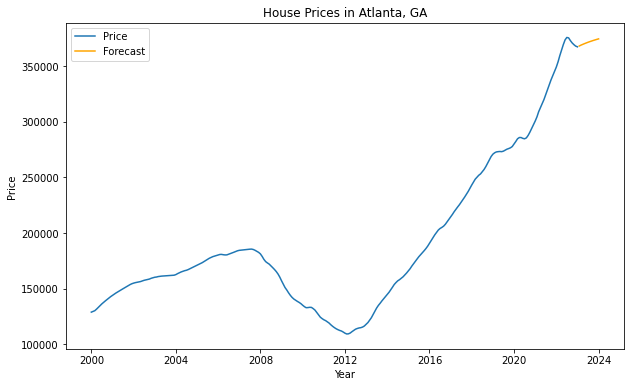

'[["2000", "1", 128939.0932], ["2000", "2", 129580.6382], ["2000", "3", 130230.171], ["2000", "4", 131664.3901], ["2000", "5", 133207.2871], ["2000", "6", 134811.1327], ["2000", "7", 136364.7871], ["2000", "8", 137772.9137], ["2000", "9", 139115.9965], ["2000", "10", 140392.4029], ["2000", "11", 141662.2816], ["2000", "12", 142894.2426], ["2001", "1", 144030.5103], ["2001", "2", 145108.2151], ["2001", "3", 146113.517], ["2001", "4", 147112.0298], ["2001", "5", 148040.0303], ["2001", "6", 149039.4582], ["2001", "7", 149936.9137], ["2001", "8", 150907.8195], ["2001", "9", 151810.5147], ["2001", "10", 152792.1822], ["2001", "11", 153698.4528], ["2001", "12", 154445.9126], ["2002", "1", 155006.63], ["2002", "2", 155452.2968], ["2002", "3", 155747.5709], ["2002", "4", 156084.8915], ["2002", "5", 156417.0222], ["2002", "6", 157030.3052], ["2002", "7", 157531.8704], ["2002", "8", 157925.6052], ["2002", "9", 158226.6382], ["2002", "10", 158661.4953], ["2002", "11", 159366.8935], ["2002", "12",

In [2]:
predict_house_price('Atlanta','GA')